## Gini Imputiry

- Gini Impurity digunakan untuk pengukuran ketidakmurnian
- Memiliki jangkauan nilai 0-1
    - 0 = nilai murni sempurna 
    - 1 = nilai tidak murni
- Formula:
$$ 
G = 1 - \sum_{i}^{n}P_{i}^{2}
$$

### Contoh kasus

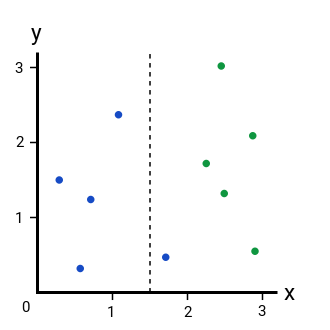

- Terdapat 10 buah data point yang terdiri dari 2 class yaitu class biru dan class hijau.
- Terdapat garis patah-patah yang sebagai splitting yang bertujuan untuk memisahkan data menjadi 2 sebut saja Ruas Kiri dan Ruas Kanan.

### Ruas Kiri

- pada ruas ini hanya terdapat 4 buah data point class biru
- Nilai probablity class biru pada ruas kiri adalah: $\frac{4}{4} = \frac{banyak anggota class biru yang ada di ruas tersebut}{keseluruhan anggota class pada ruas tersebut} $

$$
\begin{align}
G &= 1 - \sum_{i}^{n}P_{i}^{2}\\
 &= 1 - P(biru)^{2}\\
 &= 1 - (\frac{4}{4})^{2}\\
 &= 0
\end{align}
$$

- Nilai G = 0 artinya ruas kiri memiliki nilai gini impurity yang murni sempurna.

### Ruas kanan

- Pada ruas ini terdapat 6 buah data point yang terdiri dari 1 class biru dan 5 class hijau.
- Nilai probablity class biru pada ruas kanan adalah: $\frac{1}{6} = \frac{banyak anggota class biru yang ada di ruas tersebut}{keseluruhan anggota class pada ruas tersebut} $
- Nilai probablity class hijau pada ruas kanan adalah: $\frac{5}{6} = \frac{banyak anggota class biru yang ada di ruas tersebut}{keseluruhan anggota class pada ruas tersebut} $

$$
\begin{align}
G &= 1 - \sum_{i}^{n}P_{i}^{2}\\
  &= 1 - (P(biru)^{2} + P(hijau)^{2}))\\
  &= 1 - ((\frac{1}{6})^{2} + (\frac{5}{6})^{2}))\\
  &= 0.278\\
\end{align}
$$

### Average Gini Impurity

$$ 
\begin{align}\\
G &= \frac{4}{4 + 6} \times 0 + \frac{6}{4+6} \times 0.278\\
&= 0.1668
\end{align}
$$

- Nilai rata-rata berasa dari penjumlahan:
    - banyak anggota ruas kiri, di bagi banyak seluruh anggota, di kali nilai gini impurity ruas kiri.
    - banyak anggota ruas kanan, di bagi banyak seluruh anggota, di kali nilai gini impurity ruas kanan.

## Information Gain

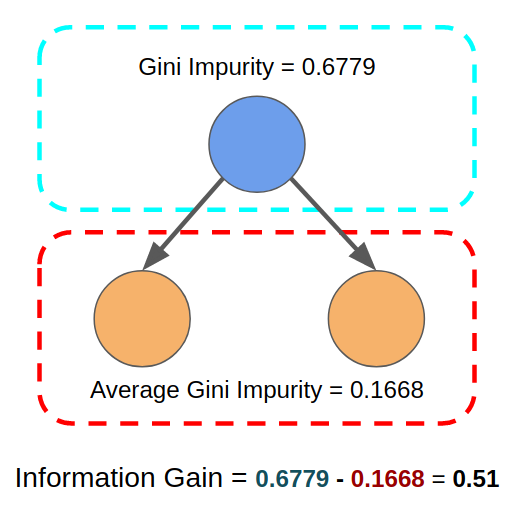

- Information Gain diperoleh dari hasil pengurangan gini impurity  yang dilakukan sebelum splitting dan nilai rata-rata gini impurity.

### Membagun Decision Tree

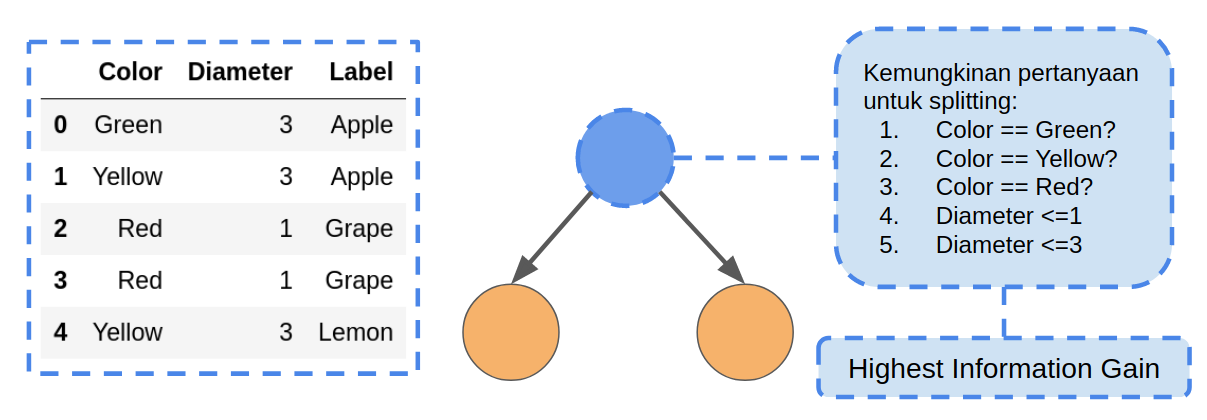

- Untuk membuat decision tree dari kasus diatas yaitu:
    - menghitung nilai gini impurity sebelum dilakukan splitting
    - lihat semua kemungkinan pertanyaan untuk splitting
    - melakukan splitting
    - menghitung nilai gini impurity setelah splitting dan nilai information gain
    - decision tree yang akan dipilih adalah decision tree dengan nilai information gain tertinggi
- nilai dari gain inpurity sebelum dilakukan spliting:
$$
\begin{align}
G &= 1 - (P(apple)^{2} + P(grape)^{2}+P(lemon)^{2}) \\
&= 1((\frac{2}{5})^{2} + (\frac{2}{5})^{2} + (\frac{1}{5})^{2})\\
&= 0.63
\end{align}
$$

## Dataset

- Dataset yang digunakan adalah iris dataset, yang berisikan data terkait bungan iris, terdiri dari 3 spesies yaitu: `Iris Setosa`, `Iris Virginica`, dan `Iris Versicolor`
- Dataset akan displit 2 bagian yaitu nilai feature yang ditampung ke dalam X sedangkan target label akan ditampung ke dala y.

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan DecisionTreeClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi Model

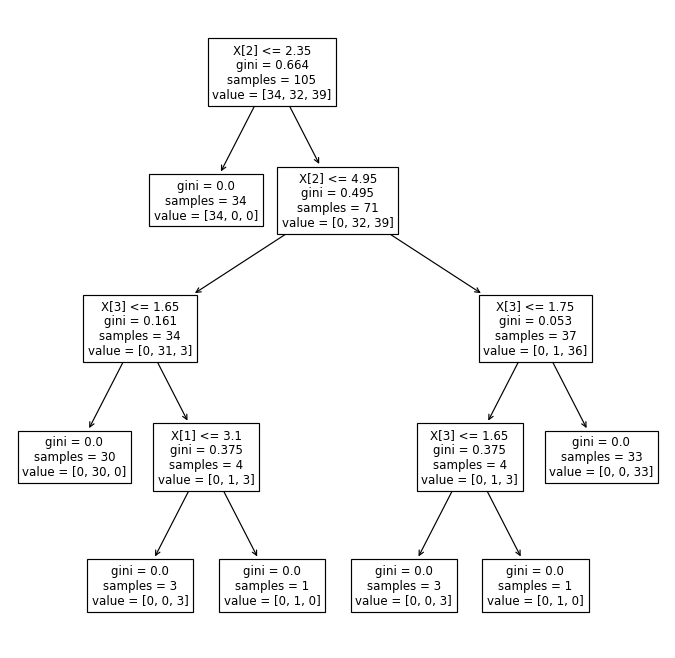

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

In [6]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

